# Quality Control of Whole Genome Sequencing
### * Gender and population based distribution plot of key alignment (9) and variants (7) based QC metrics of single-sample WGS results.
### * 100 samples were selected from 1000genomes (https://www.internationalgenome.org/data-portal/) as diverse by gender and population (Superpopulation code/name and Population code/name) categories.
### * Superpopulation: 5
      AFR, AMR, EAS, EUR, SAS
### * Population: 26
      African Ancestry SW 4, African Caribbean 4, Bengali 5, British 4, CEPH 4, Colombian 4, Dai Chinese 4, Esan 4, Finnish 4, Gambian Mandinka 4, Gujarati 4, Han Chinese 4, Iberian 4, Japanese 4, Kinh Vietnamese 4, Luhya 4, Mende 4, Mexican Ancestry 4, Peruvian 4, Puerto Rican 2, Punjabi 3, Southern Han Chinese 2, Tamil 4, Telugu 4, Toscani 4, Yoruba 4.

## Display metrics distribution

In [13]:
import pandas as pd

# Helper function: Read metrics.json file, and reformat the resulting dataframe
def preprocess_json(file):
    df_ = pd.read_json(file)
    df_.columns = ['biosample', df_['biosample']['id']]
    df_ = df_.drop(columns=['biosample'])
    df_ = df_.drop(['id'])
    return df_

ylims = {
    # 'cross_contamination_rate': [0,0.02],
    # 'pct_autosomes_15x': [95, 97],
}

In [14]:
import pandas as pd
import glob

# Load all the metrics.json file within a directory
files = glob.glob(f'../n.100-1kg-igsr-diversity-dragen3.7.6-npm-sample-qc-aln-vc-results/*.metrics.json')
# Parse 1 file in 1 df
df_array = [preprocess_json(file) for file in files]
# Concat all df into one
df_ = pd.concat(df_array, axis=1, ignore_index=False)
# Transpose
dft = df_.T.reset_index()

dft


# Read the samples metadata csv file into pandas DataFrames
df_metadata = pd.read_csv('../1KG_100samples_diversity_info_igsr.csv')
df_metadata


# Select only the 'Sample_name' 'Sex' and 'Population_name' columns from df_metadata
df_metadata = df_metadata[['Sample_name', 'Sex', 'Population_name', 'Superpopulation_code']]


# Merge the DataFrames on the 'Sample_name' column, retaining all rows from dft
# merged_df = pd.merge(dft, df_metadata1, on='Sample_name', how='left')
merged_dft = pd.merge(dft, df_metadata, left_on='index', right_on='Sample_name', how='left')

merged_dft



,index,count_deletions,count_insertions,count_snvs,cross_contamination_rate,insert_size_std_deviation,mad_autosome_coverage,mean_autosome_coverage,mean_insert_size,pct_autosomes_15x,...,pct_reads_properly_paired,ratio_heterozygous_homzygous_indel,ratio_heterozygous_homzygous_snv,ratio_insertion_deletion,ratio_transitions_transversions_snv,yield_bp_q30,Sample_name,Sex,Population_name,Superpopulation_code
0,HG00100,435012.0,420547.0,3906868.0,1.131790e-09,99.3,4.0,29.94,429.5,95.90,...,98.4,1.93,1.57,0.97,1.96,1.029844e+11,HG00100,female,British,EUR
1,NA18530,436571.0,420988.0,3918397.0,5.754080e-06,101.5,5.0,32.22,444.7,96.04,...,97.8,1.73,1.38,0.96,1.96,1.101393e+11,NA18530,male,Han Chinese,EAS
2,NA18525,433827.0,419277.0,3896706.0,4.081840e-08,100.3,5.0,31.40,444.1,95.93,...,98.0,1.69,1.36,0.97,1.96,1.071952e+11,NA18525,female,Han Chinese,EAS
3,NA19025,509296.0,484689.0,4723041.0,1.955180e-09,100.9,5.0,32.26,436.9,95.98,...,98.1,2.64,1.98,0.95,1.97,1.116975e+11,NA19025,male,Luhya,AFR
4,NA19701,501143.0,481712.0,4661419.0,3.891370e-09,100.4,4.0,31.41,435.5,95.90,...,97.9,2.74,2.08,0.96,1.97,1.114505e+11,NA19701,female,African Ancestry SW,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HG02601,444465.0,429490.0,4015871.0,3.510830e-06,100.4,4.0,29.54,441.5,95.80,...,98.0,2.05,1.64,0.97,1.96,1.066396e+11,HG02601,female,Punjabi,SAS
96,HG03718,438275.0,425540.0,3972417.0,6.584560e-04,93.6,4.0,28.83,415.0,95.72,...,97.6,1.89,1.55,0.97,1.96,9.890164e+10,HG03718,male,Telugu,SAS
97,HG01880,491087.0,470741.0,4537205.0,1.890120e-06,100.4,4.0,28.63,437.4,95.66,...,98.1,2.85,2.16,0.96,1.97,1.012077e+11,HG01880,female,African Caribbean,AFR
98,NA19650,441473.0,426598.0,3982260.0,1.748300e-09,101.4,5.0,33.39,450.2,96.07,...,98.2,2.12,1.68,0.97,1.96,1.089609e+11,NA19650,male,Mexican Ancestry,AMR


## Plots colour by gender

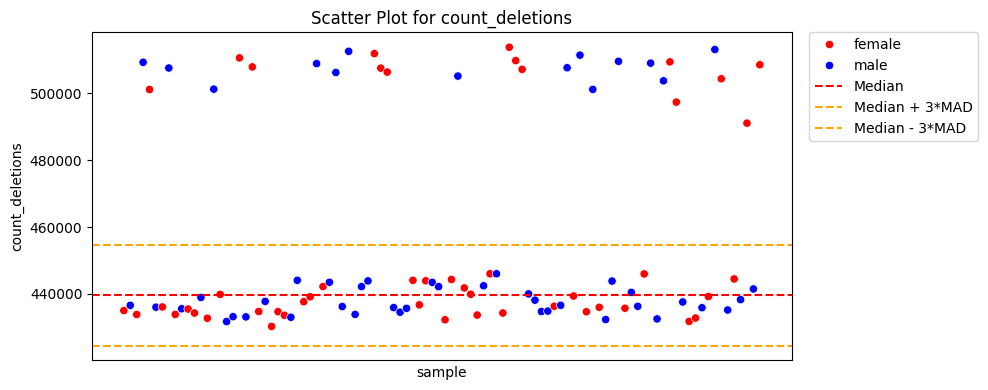

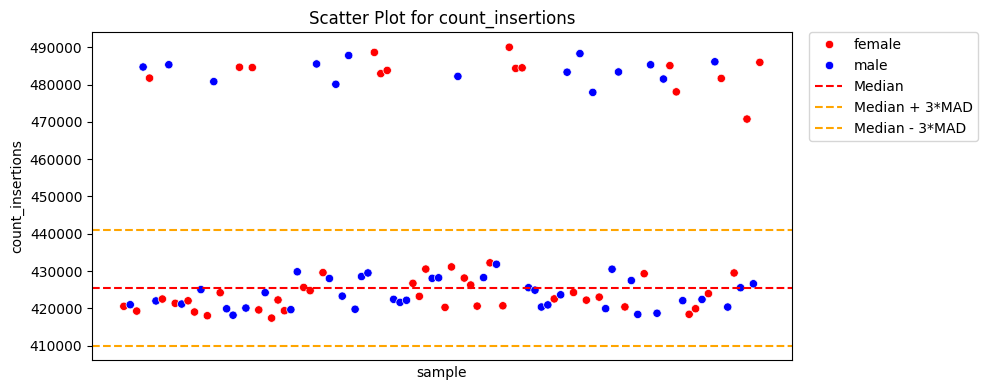

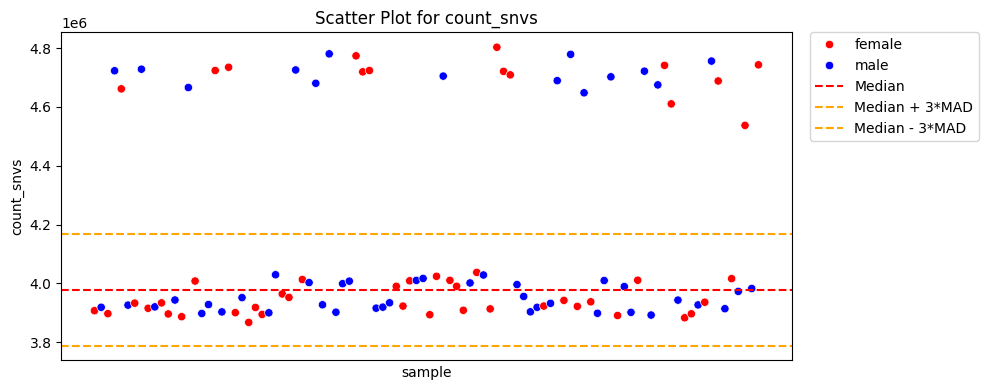

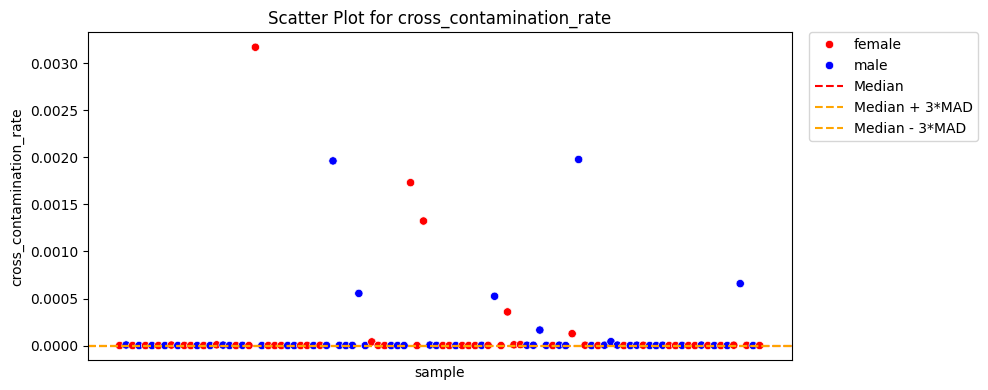

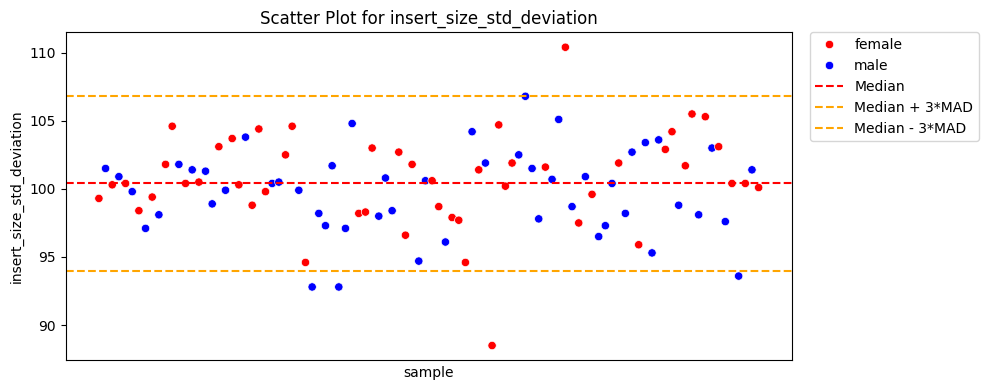

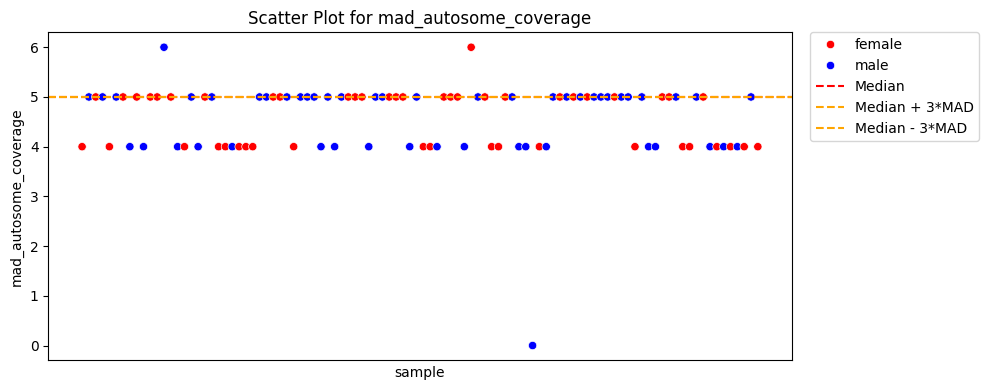

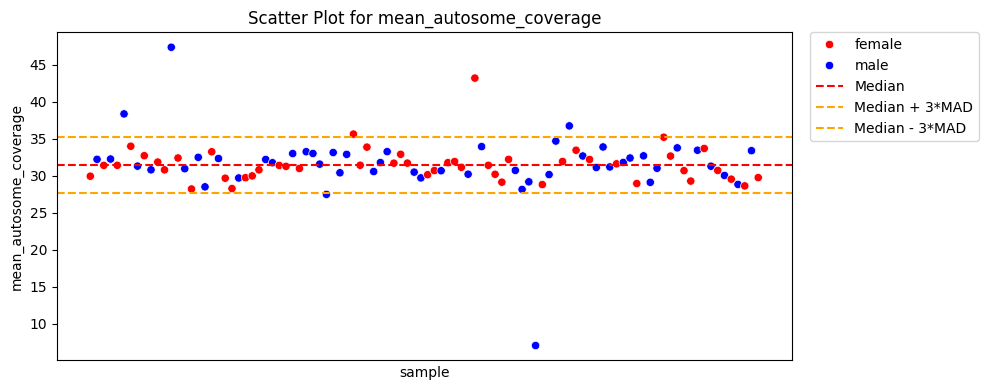

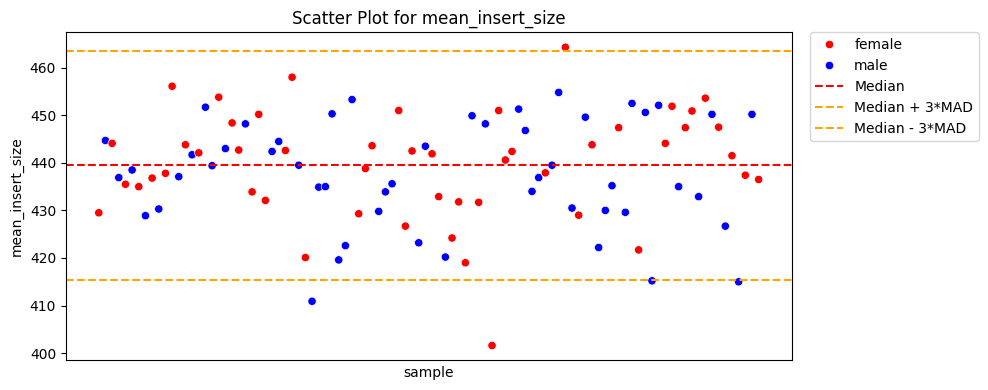

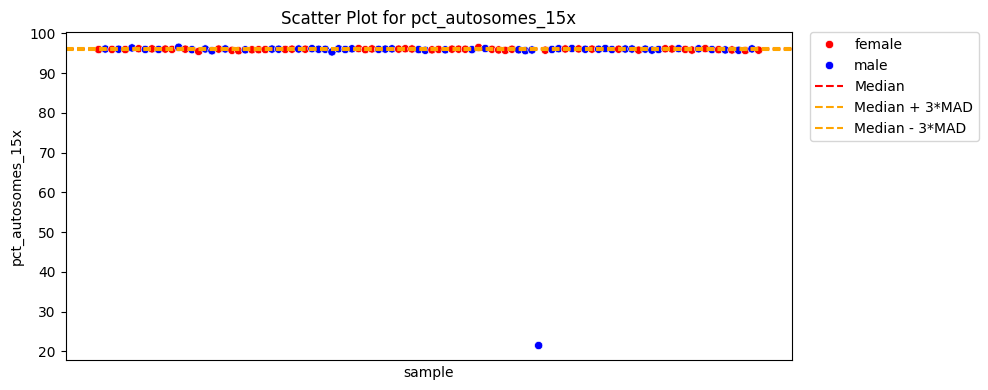

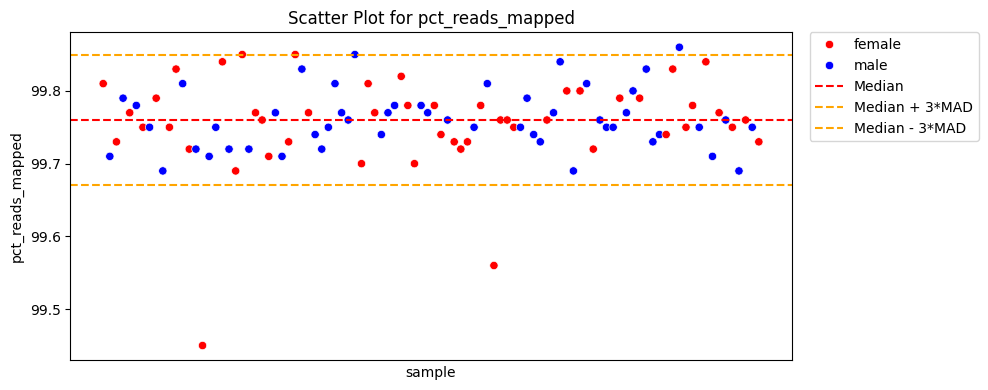

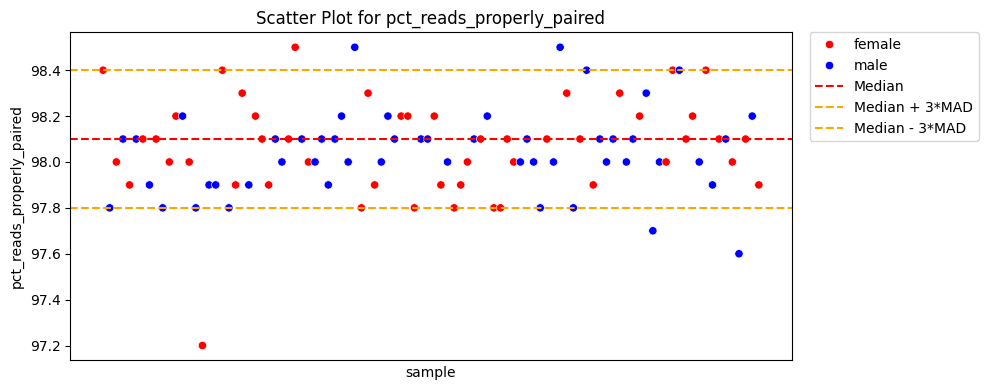

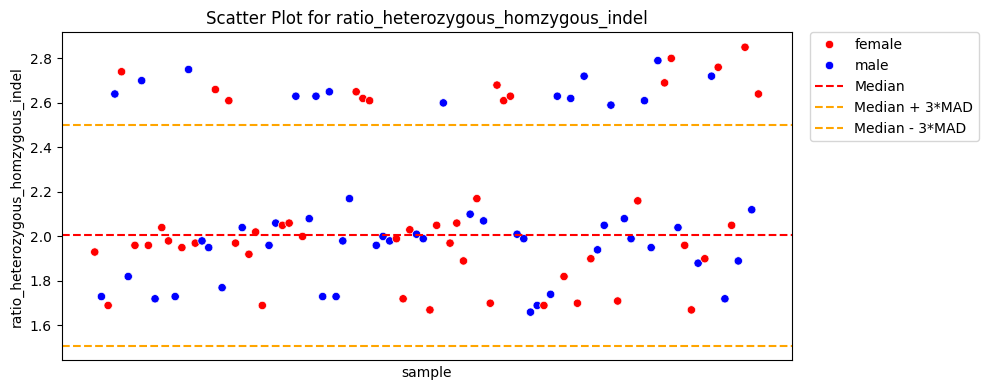

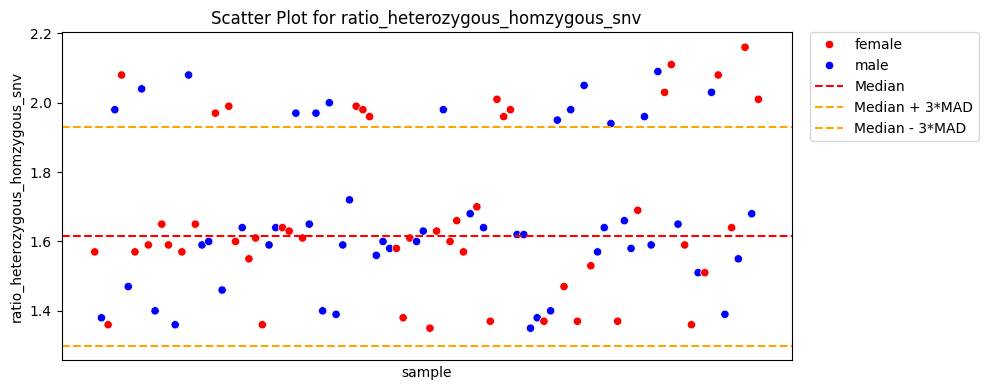

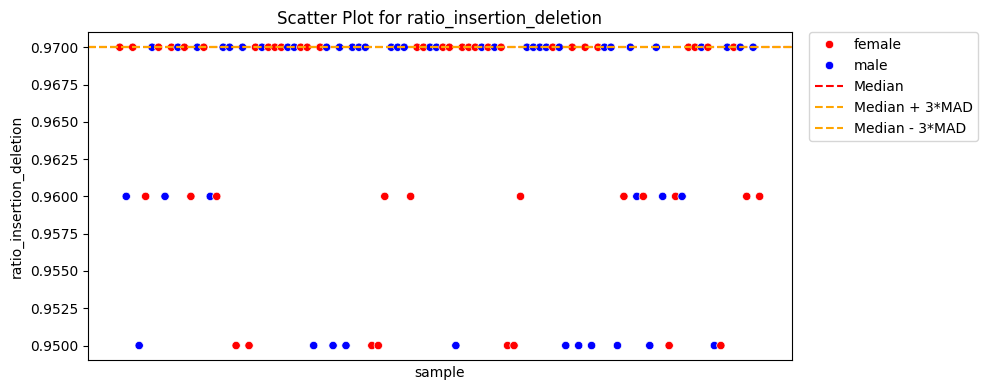

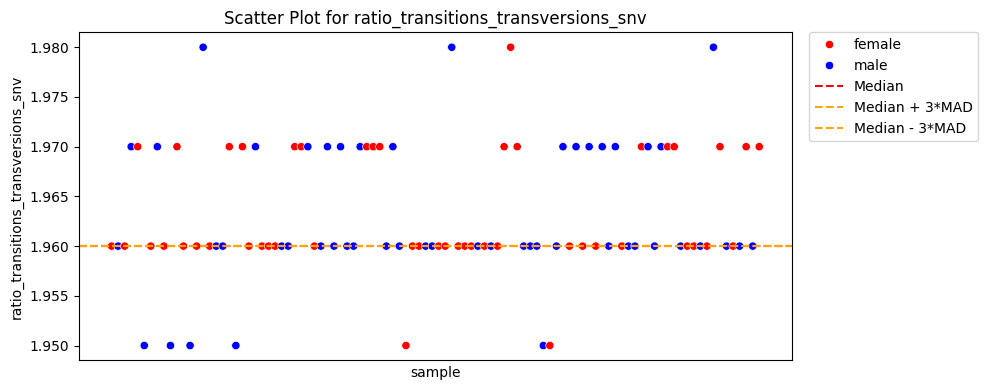

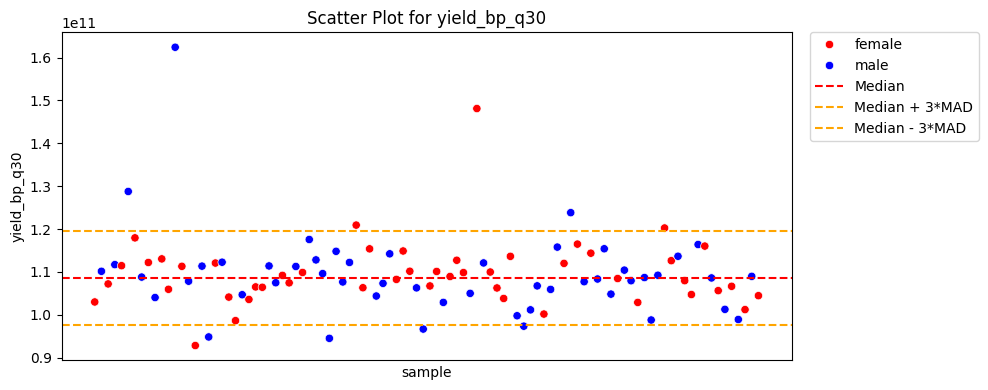

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For each metric
for col in merged_dft.columns[1:17]:
     
    # Create a scatter plot
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=merged_dft, x="index", y=col, 
                    hue='Sex', palette = {'male':'blue', 'female':'red'} )
    
    # Calculate median and MAD
    median = merged_dft[col].median()
    mad = np.median(np.abs(merged_dft[col] - median))
    
    # Add median and +/-3MAD lines
    plt.axhline(y=median, linestyle='--', color='red', label='Median')
    plt.axhline(y=median + 3 * mad, linestyle='--', color='orange', label='Median + 3*MAD')
    plt.axhline(y=median - 3 * mad, linestyle='--', color='orange', label='Median - 3*MAD')
    
    # Set plot title and labels
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("sample")
    plt.ylabel(col)
    plt.xticks([]) # Hide x-axis labels

    if col in ylims:
        plt.ylim(ylims[col][0], ylims[col][1])

    # Show legend
    # plt.legend()
    plt.legend(bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()

    # Show the plot
    plt.show()


## Plots colour by population

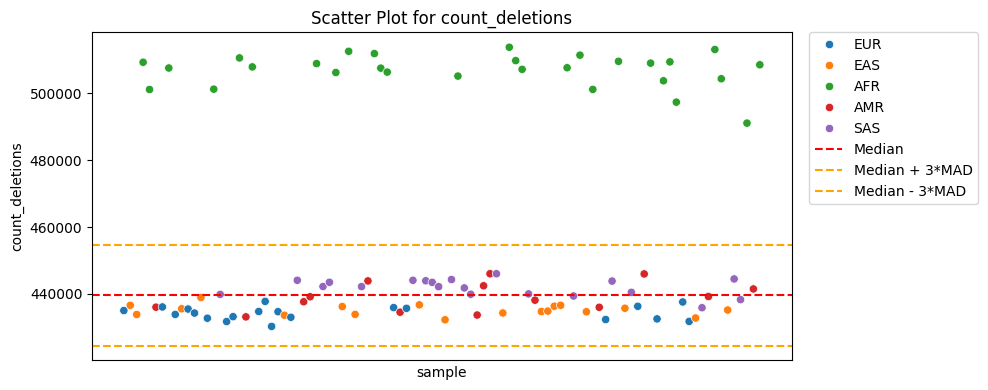

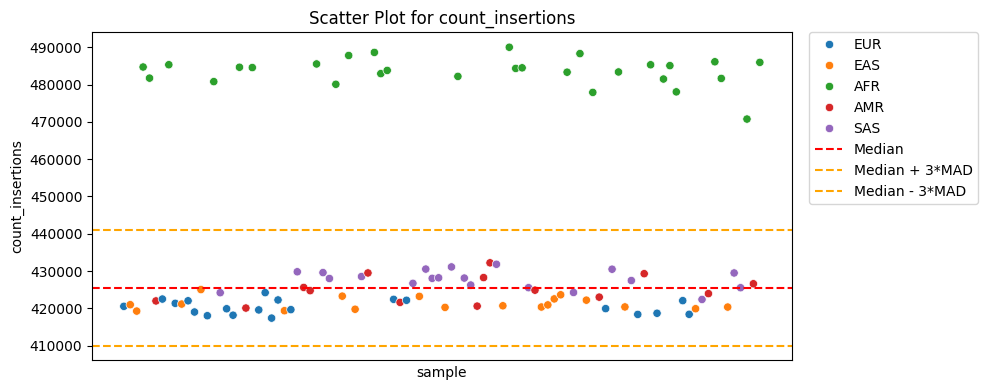

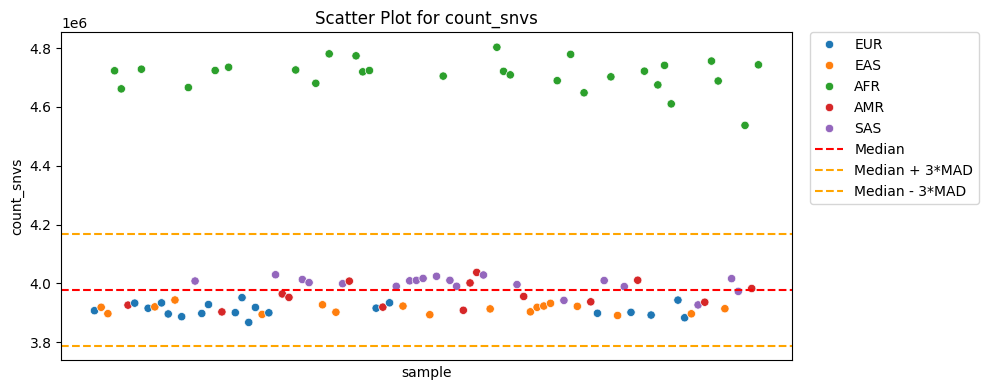

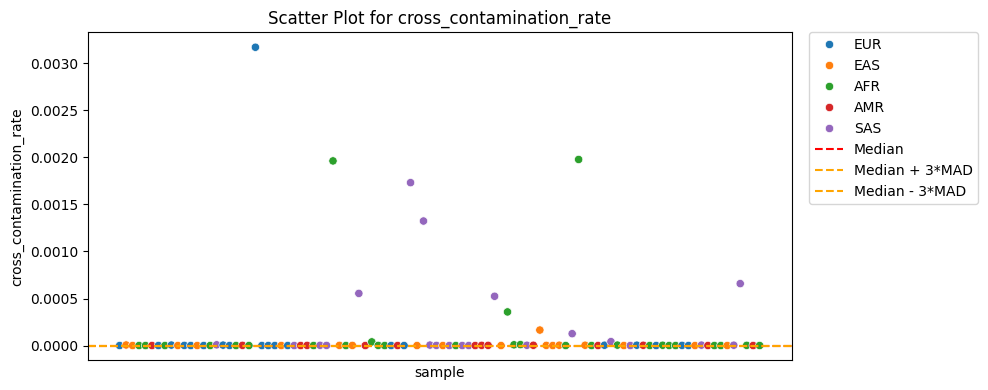

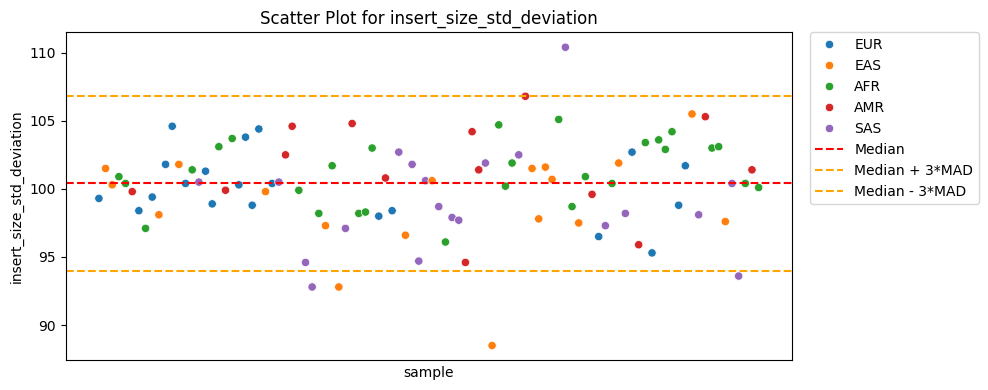

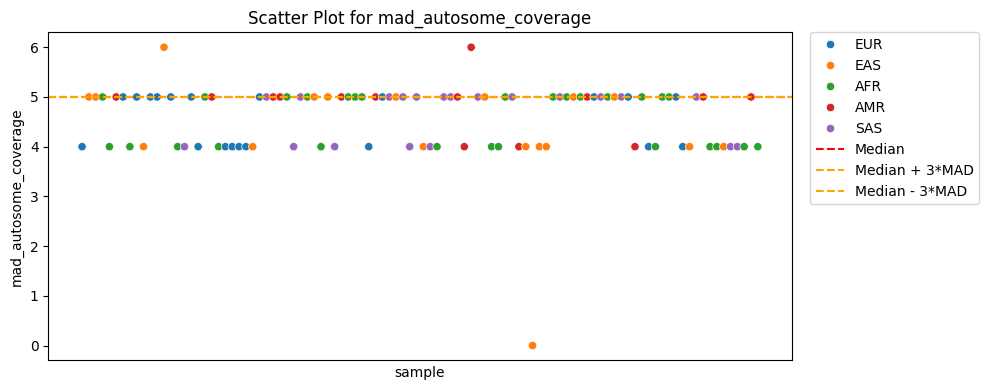

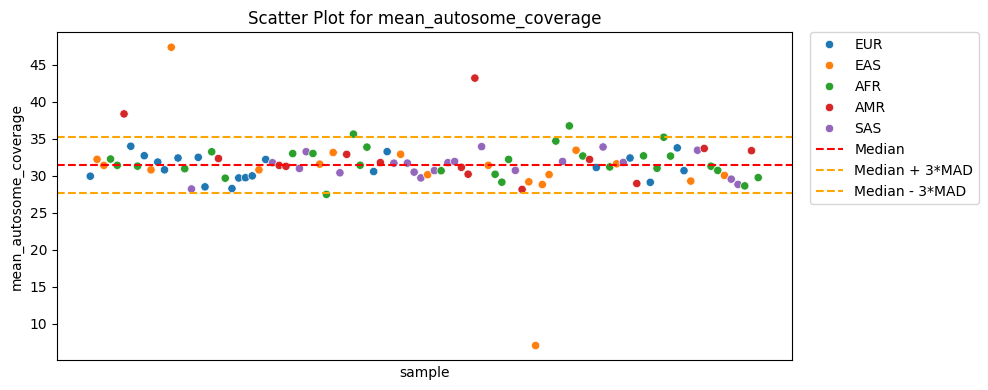

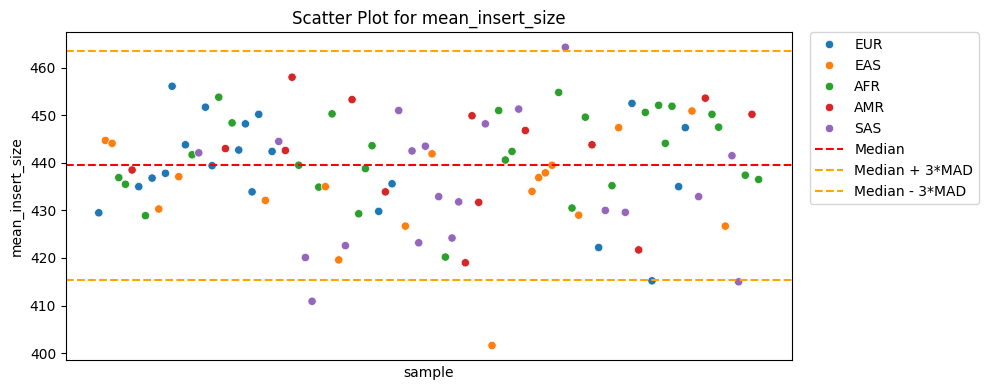

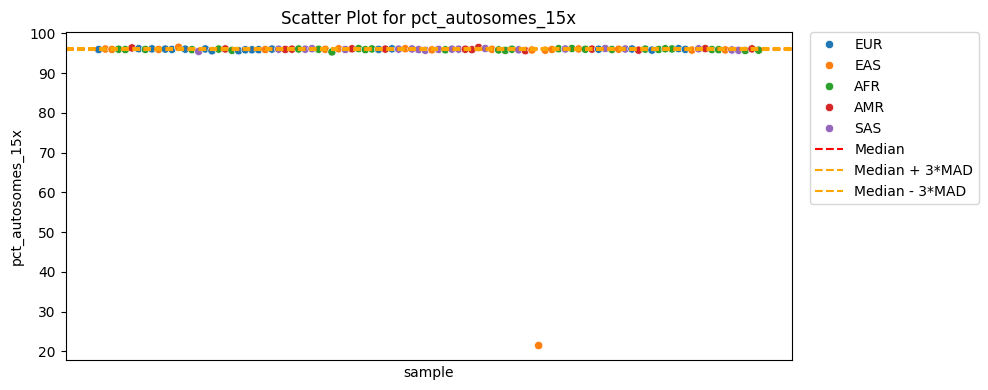

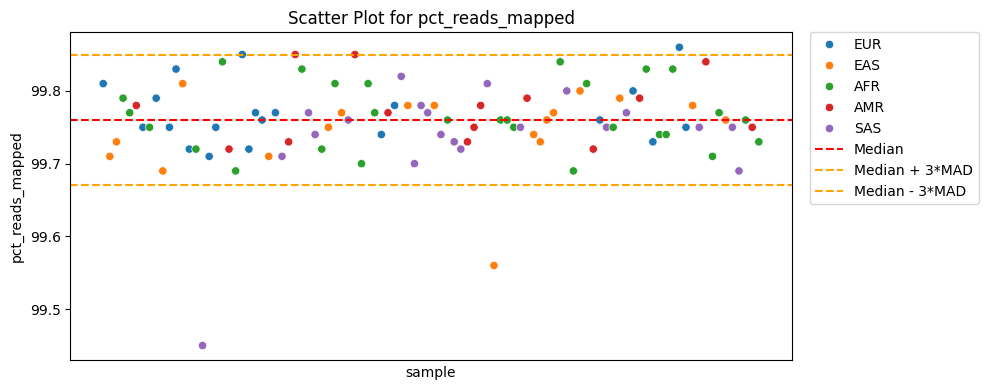

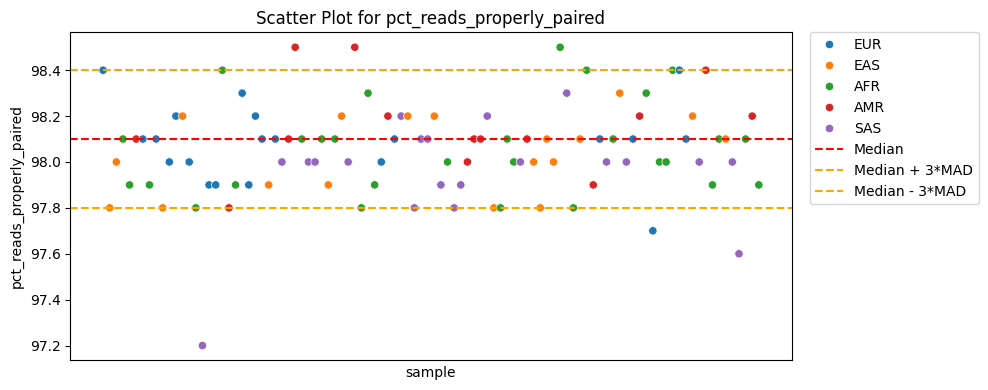

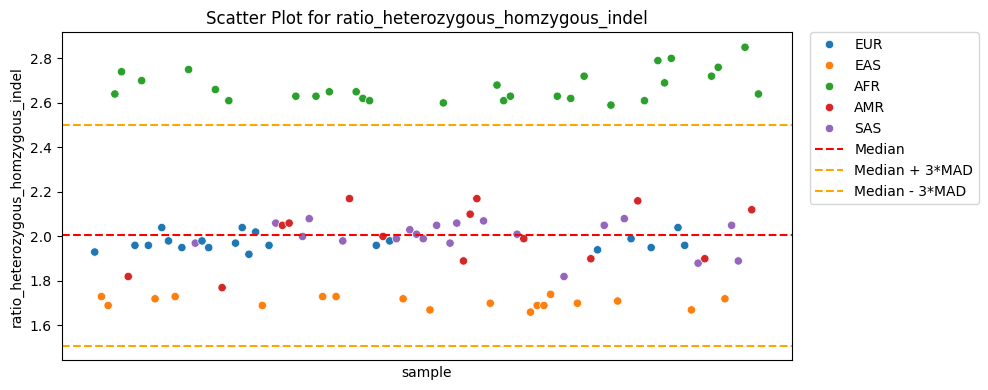

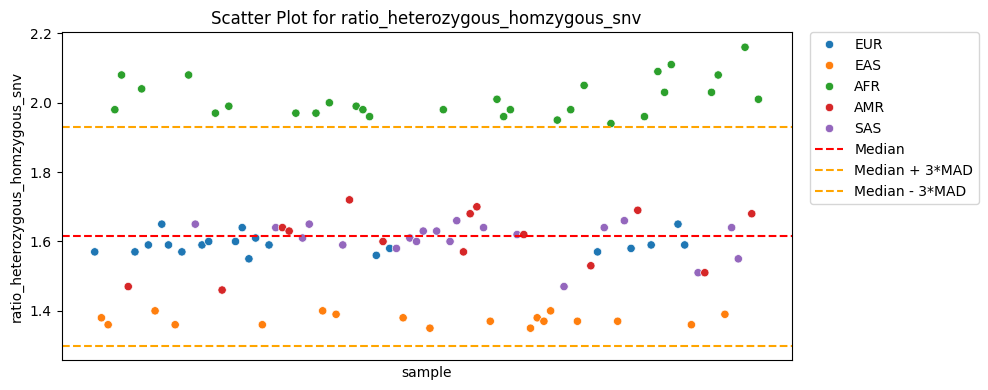

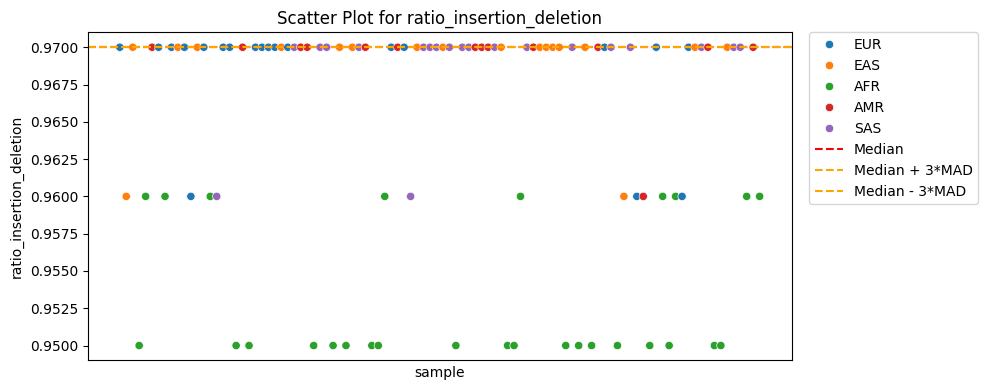

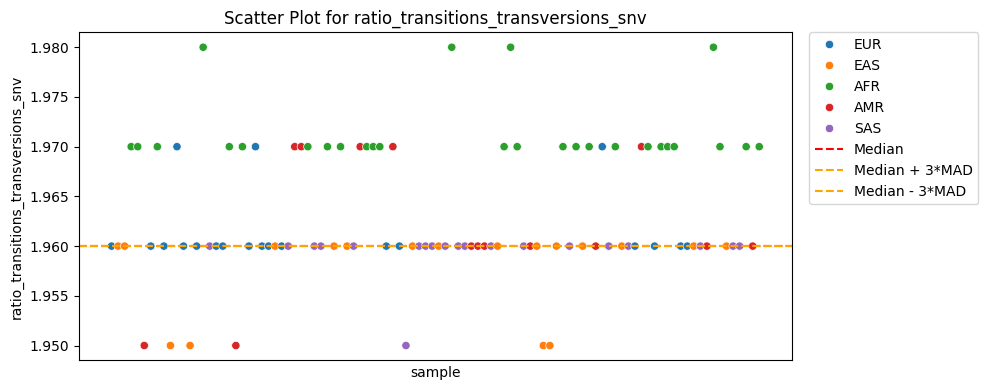

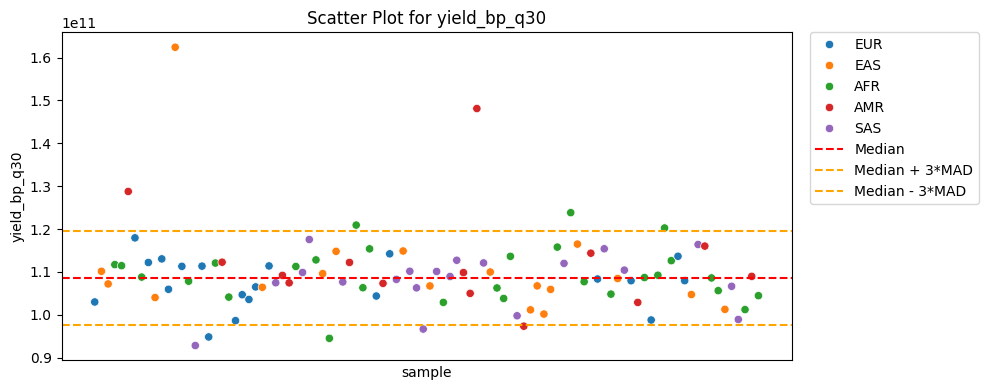

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For each metric
for col in merged_dft.columns[1:17]:
     
    # Create a scatter plot
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=merged_dft, x="index", y=col, hue='Superpopulation_code')
    
    # Calculate median and MAD
    median = merged_dft[col].median()
    mad = np.median(np.abs(merged_dft[col] - median))
    
    # Add median and +/-3MAD lines
    plt.axhline(y=median, linestyle='--', color='red', label='Median')
    plt.axhline(y=median + 3 * mad, linestyle='--', color='orange', label='Median + 3*MAD')
    plt.axhline(y=median - 3 * mad, linestyle='--', color='orange', label='Median - 3*MAD')
    
    # Set plot title and labels
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("sample")
    plt.ylabel(col)
    plt.xticks([]) # Hide x-axis labels

    if col in ylims:
        plt.ylim(ylims[col][0], ylims[col][1])

    # Show legend
    # plt.legend()
    plt.legend(bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()

    # Show the plot
    plt.show()